In [1]:
import talib as ta
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
import numpy as np

In [2]:
data = pd.read_csv('Infy.csv')
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,522.250000,515.000000,518.849976,516.775024,5431340.0,455.430542
1,2018-01-02,521.000000,511.500000,518.625000,514.849976,6112248.0,453.734009
2,2018-01-03,515.799988,509.299988,514.250000,510.649994,6846552.0,450.032593
3,2018-01-04,510.500000,504.799988,510.500000,507.700012,8947614.0,447.432831
4,2018-01-05,513.200012,503.000000,507.649994,506.000000,11025976.0,445.934631
...,...,...,...,...,...,...,...
1203,2022-11-16,1609.000000,1593.500000,1597.150024,1602.800049,4497697.0,1602.800049
1204,2022-11-17,1602.800049,1582.949951,1597.199951,1587.400024,3469515.0,1587.400024
1205,2022-11-18,1598.000000,1575.500000,1591.699951,1593.400024,3126064.0,1593.400024
1206,2022-11-21,1587.849976,1564.050049,1582.099976,1568.199951,3071764.0,1568.199951


In [3]:
Infy = pd.DataFrame({"Date":data['Date'], "Close":
data['Close']})
Infy = Infy.set_index('Date')
Infy

,Close
Date,
2018-01-01,516.775024
2018-01-02,514.849976
2018-01-03,510.649994
2018-01-04,507.700012
2018-01-05,506.000000
...,...
2022-11-16,1602.800049
2022-11-17,1587.400024
2022-11-18,1593.400024


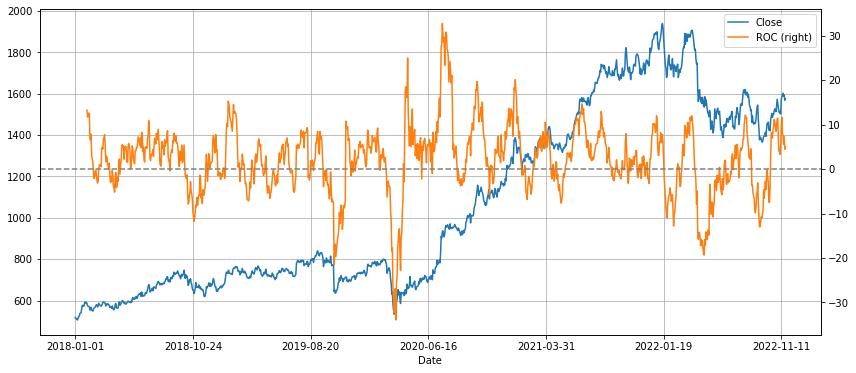

In [4]:
# المؤشرات الزخمية لتحديد إمكانية عكس الترند أو أستمرار الترند 
# الزخم هو سرعة وحجم الترند 
# ROC هو مؤشر فني يقيس إحتلاف السعر بين السعر الحالي وعدد مؤكد من فنرات أقدم 
# (ترند هابط,roc<0),(ترند صاعد,roc>0)
# الزيادة الحادة في القيمة تشير الى الزيادة الزخمية 
Infy['ROC'] = ta.ROC(Infy['Close'],20)
Infy[['Close', 'ROC']].plot(grid=True, secondary_y='ROC',
figsize=(14,6))
plt.axhline(0, color='gray', linestyle='--')

In [5]:
# تشكيل بيانات بشكل معين 
data = data[data['Date'] <= '2020-12-30'].set_index('Date')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,522.250000,515.000000,518.849976,516.775024,5431340.0,455.430542
2018-01-02,521.000000,511.500000,518.625000,514.849976,6112248.0,453.734009
2018-01-03,515.799988,509.299988,514.250000,510.649994,6846552.0,450.032593
2018-01-04,510.500000,504.799988,510.500000,507.700012,8947614.0,447.432831
2018-01-05,513.200012,503.000000,507.649994,506.000000,11025976.0,445.934631
...,...,...,...,...,...,...
2020-12-23,1258.849976,1230.550049,1238.000000,1253.050049,15878346.0,1202.761353
2020-12-24,1249.900024,1226.000000,1249.900024,1236.050049,7313885.0,1186.443726
2020-12-28,1248.000000,1236.000000,1238.449951,1240.300049,4607051.0,1190.523071


In [6]:
# (الترند أدنى من متوسط السعر,cci<-100),(الترند أعلى من متوسط السعر ,cci>+100)
data['CCI'] = ta.CCI(data['High'], data['Low'], data['Close'],timeperiod=14)
data

,High,Low,Open,Close,Volume,Adj Close,CCI
Date,,,,,,,
2018-01-01,522.250000,515.000000,518.849976,516.775024,5431340.0,455.430542,NaN
2018-01-02,521.000000,511.500000,518.625000,514.849976,6112248.0,453.734009,NaN
2018-01-03,515.799988,509.299988,514.250000,510.649994,6846552.0,450.032593,NaN
2018-01-04,510.500000,504.799988,510.500000,507.700012,8947614.0,447.432831,NaN
2018-01-05,513.200012,503.000000,507.649994,506.000000,11025976.0,445.934631,NaN
...,...,...,...,...,...,...,...
2020-12-23,1258.849976,1230.550049,1238.000000,1253.050049,15878346.0,1202.761353,259.373070
2020-12-24,1249.900024,1226.000000,1249.900024,1236.050049,7313885.0,1186.443726,165.463739
2020-12-28,1248.000000,1236.000000,1238.449951,1240.300049,4607051.0,1190.523071,135.509837


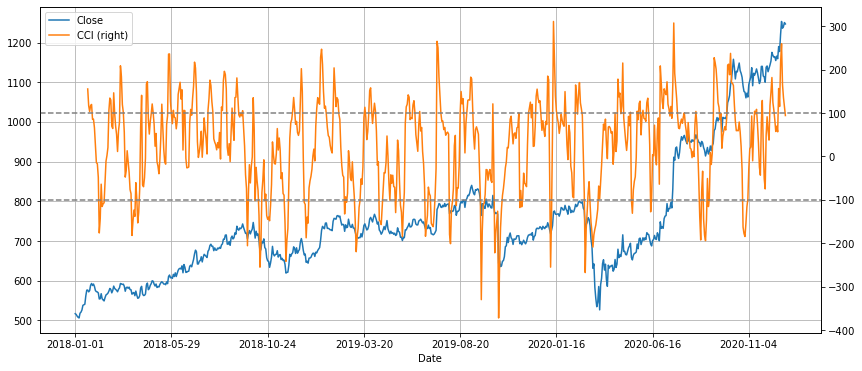

In [7]:
data[['Close', 'CCI']].plot(grid=True, secondary_y='CCI',figsize=(14,6))
plt.axhline(100, color='gray', linestyle='--')
plt.axhline(-100, color='gray', linestyle='--')
plt.xlabel('Time')
plt.show()

In [8]:
# RSI مؤشر فنى يستخدم في تحليل الأسواق المالية 
# إما خط المقارنة عند 50 أة خطين مقارنة عند(30,70) 
Infy['RSI'] = ta.RSI(Infy['Close'],21)

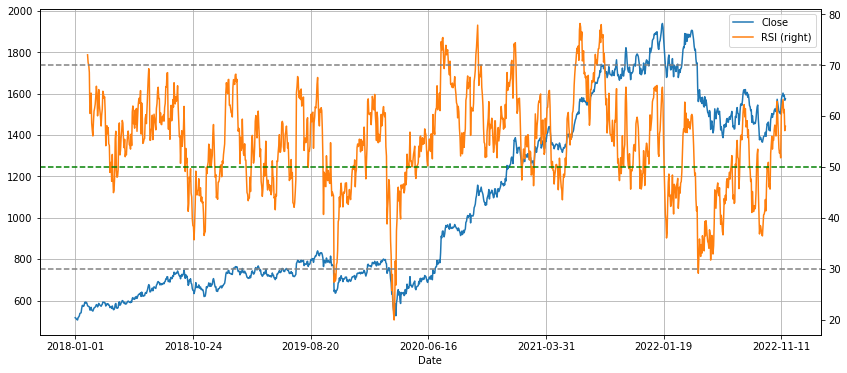

In [9]:
Infy[['Close', 'RSI']].plot(grid=True, secondary_y='RSI',figsize=(14,6))
plt.axhline(70, color='gray', linestyle='--')
plt.axhline(50, color='green', linestyle='--')
plt.axhline(30, color='gray', linestyle='--')

In [10]:
# تم الشرح سابقا 
# خط المقارنة عند الصفر 
Infy['macd'], Infy['macdsignal'], Infy['macdhist'] =ta.MACD(Infy['Close'], fastperiod=12, slowperiod=26,signalperiod=9)

Text(0.5, 0.98, 'Infosys Close Prices and MACD(12,26,9)')

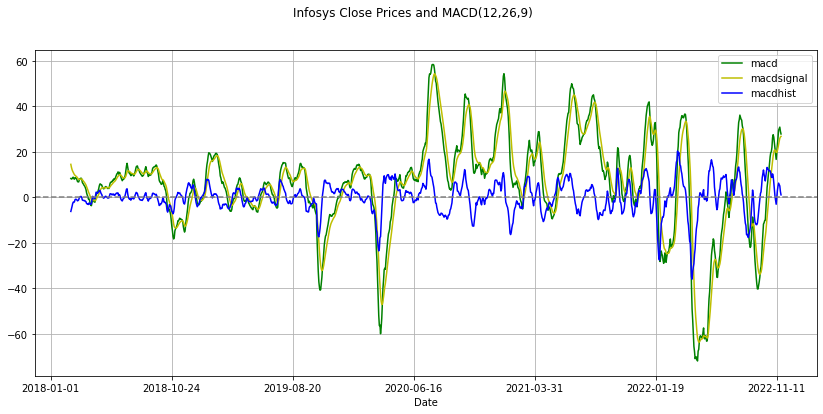

In [11]:
Infy[['macd','macdsignal','macdhist']].plot(grid=True,color=list('gyb'),figsize=(14,6))
plt.axhline(0, color='gray', linestyle='--')
plt.suptitle('Infosys Close Prices and MACD(12,26,9)')